# Визуализация многомерных данных. Создание пиктограмм при помощи Matplotlib.


### Вариант #1

#### Цель:
научиться использовать нестандартные модели визуализации многомерных данных для исследования данных и научиться обосновывать их выбор.
Целью работы является освоение основ разработки собственных моделей визуализации с помощью библиотеки Matplotlib.

Был выполнен анализ данных и разработана модель визуализации лица Чернова для их графического представления.

У нас было 8-10 параметров, представленных одномерными временными рядами, описывающими функционирование системы в течение 14 дней. Данные были взяты из Kaggle.


## Init

In [146]:
#bldg-MC2
import sys

!{sys.executable} -m pip install numpy scipy scikit-learn jupyter matplotlib pandas seaborn
%matplotlib inline

import zipfile
import os

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from IPython.display import Image
from matplotlib.patches import Ellipse, PathPatch, Arc, Polygon, Wedge

plt.rcParams['figure.dpi'] = 300

## Загрузка данных

### About data



| **Field** | **type** | **Description** |
|---|---|---|
| **F_1_Z_1: Lights Power**         | float64 | мощность света                                       |
| **F_1_Z_1: Equipment Power**         | float64 | мощность оборудования                                      |
| **F_1_Z_1: Thermostat Temp**        | float64 | температура термостата                                     |
| **F_1_Z_1: Thermostat Heating Setpoin**        | float64 | установленное значение нагрева термостата                               |
| **F_1_Z_1: Thermostat Cooling Setpoint**  | float64 | установленное значение охлаждения термостата       |
| **F_1_Z_1 VAV REHEAT Damper Position**  | float64 | положение заслонки повторного нагрева vav         |
| **F_1_Z_1 REHEAT COIL Power** | float64 |  мощность катушки повторного нагрева      |
| **F_1_Z_1 RETURN OUTLET CO2 Concentration** | float64 | концентрация углекислого газа на выходе |
| **F_1_Z_1 SUPPLY INLET Mass Flow Rate**            | float64 | температура подачи на входе                                |
| **F_1_Z_1: Mechanical Ventilation Mass Flow Rate**           | float64 | массовый расход механической вентиляции           |



### Извлечение данных

In [177]:
data = pd.read_csv("C:/Users/romas/Desktop/визуализация/bldg-MC2.csv")

#print(data.info())

In [178]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')
data['Date'] = data["Date/Time"].dt.date
data = [group[1] for group in data.groupby(['Date'])]

In [179]:
data = [df.filter(regex='^ F_1_Z_1') for df in data]
data = [df.rename(columns=lambda x: x.strip()) for df in data]

for df in data:
    df.reset_index(drop= True, inplace= True)

In [180]:
tracked_columns =[
    "F_1_Z_1: Lights Power",
    "F_1_Z_1: Equipment Power",
    "F_1_Z_1: Thermostat Temp",
    "F_1_Z_1: Thermostat Heating Setpoint",
    "F_1_Z_1: Thermostat Cooling Setpoint",
    "F_1_Z_1 VAV REHEAT Damper Position",
    "F_1_Z_1 REHEAT COIL Power",
    "F_1_Z_1 RETURN OUTLET CO2 Concentration",
    "F_1_Z_1 SUPPLY INLET Temperature",
    "F_1_Z_1 SUPPLY INLET Mass Flow Rate",
    "F_1_Z_1: Mechanical Ventilation Mass Flow Rate"]
data = [df[tracked_columns] for df in data]

In [181]:
data[0].head(20)

,F_1_Z_1: Lights Power,F_1_Z_1: Equipment Power,F_1_Z_1: Thermostat Temp,F_1_Z_1: Thermostat Heating Setpoint,F_1_Z_1: Thermostat Cooling Setpoint,F_1_Z_1 VAV REHEAT Damper Position,F_1_Z_1 REHEAT COIL Power,F_1_Z_1 RETURN OUTLET CO2 Concentration,F_1_Z_1 SUPPLY INLET Temperature,F_1_Z_1 SUPPLY INLET Mass Flow Rate,F_1_Z_1: Mechanical Ventilation Mass Flow Rate
0,0.0,268.7023,24.4499,15.6,26.7,0.0,0.0,841.5161,24.4533,0.0,0.0
1,0.0,268.7023,24.4448,15.6,26.7,0.0,0.0,835.4528,24.4499,0.0,0.0
2,0.0,268.7023,24.3777,15.6,26.7,0.0,0.0,829.4711,24.4448,0.0,0.0
3,0.0,268.7023,24.3298,15.6,26.7,0.0,0.0,823.5722,24.3777,0.0,0.0
4,0.0,268.7023,24.2937,15.6,26.7,0.0,0.0,817.7547,24.3298,0.0,0.0
5,0.0,268.7023,24.2653,15.6,26.7,0.0,0.0,812.0172,24.2937,0.0,0.0
6,0.0,268.7023,24.2419,15.6,26.7,0.0,0.0,806.3584,24.2653,0.0,0.0
7,0.0,268.7023,24.2220,15.6,26.7,0.0,0.0,800.7772,24.2419,0.0,0.0
8,0.0,268.7023,24.2046,15.6,26.7,0.0,0.0,795.2724,24.2220,0.0,0.0
9,0.0,268.7023,24.1888,15.6,26.7,0.0,0.0,789.8430,24.2046,0.0,0.0


In [182]:
scaled_data = data
for i, df in enumerate(data):
    scaled_temp = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(df), 
    columns=df.columns    )
    scaled_data[i]=scaled_temp
scaled_data[0].head()
data = scaled_data

## Вычисление корреляции между признаками в данных

In [183]:
def get_empty_columns_names(df):
    empty = [col for col in df.columns if (df[col].isnull().all() or df[col].isna().all())]
    return empty

In [184]:
def heatmap(df, ax, title):
    corr = df.corr()

    # Omit pairs with weak correlation, try to experiments with this setting
    df_corr = corr[((corr >= .6) | (corr <= -.6))]

    #print("Empty columns:", get_empty_columns_names(df_corr))

    mask = np.triu(np.ones_like(corr))
    sns.heatmap(
        df_corr, 
        cbar=False, 
        mask=mask,
        ax=ax, 
        annot=True, 
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
    )

    ax.title.set_text(title)
    ax.tick_params(
        top=False,
        bottom=False,
        left=False,
        right=False,
    )

In [185]:
fig, ax = plt.subplots(
    nrows=7, 
    ncols=2, 
    sharey=True, 
    sharex=True, 
    figsize=(15, 30), 
    constrained_layout=True
)

axes = ax.flatten()

for i, df in enumerate(data):
    heatmap(df, axes[i], f"Day {i + 1}")
    
fig.suptitle('Heatmaps')
plt.savefig("heatmaps.png", bbox_inches="tight")
plt.close()

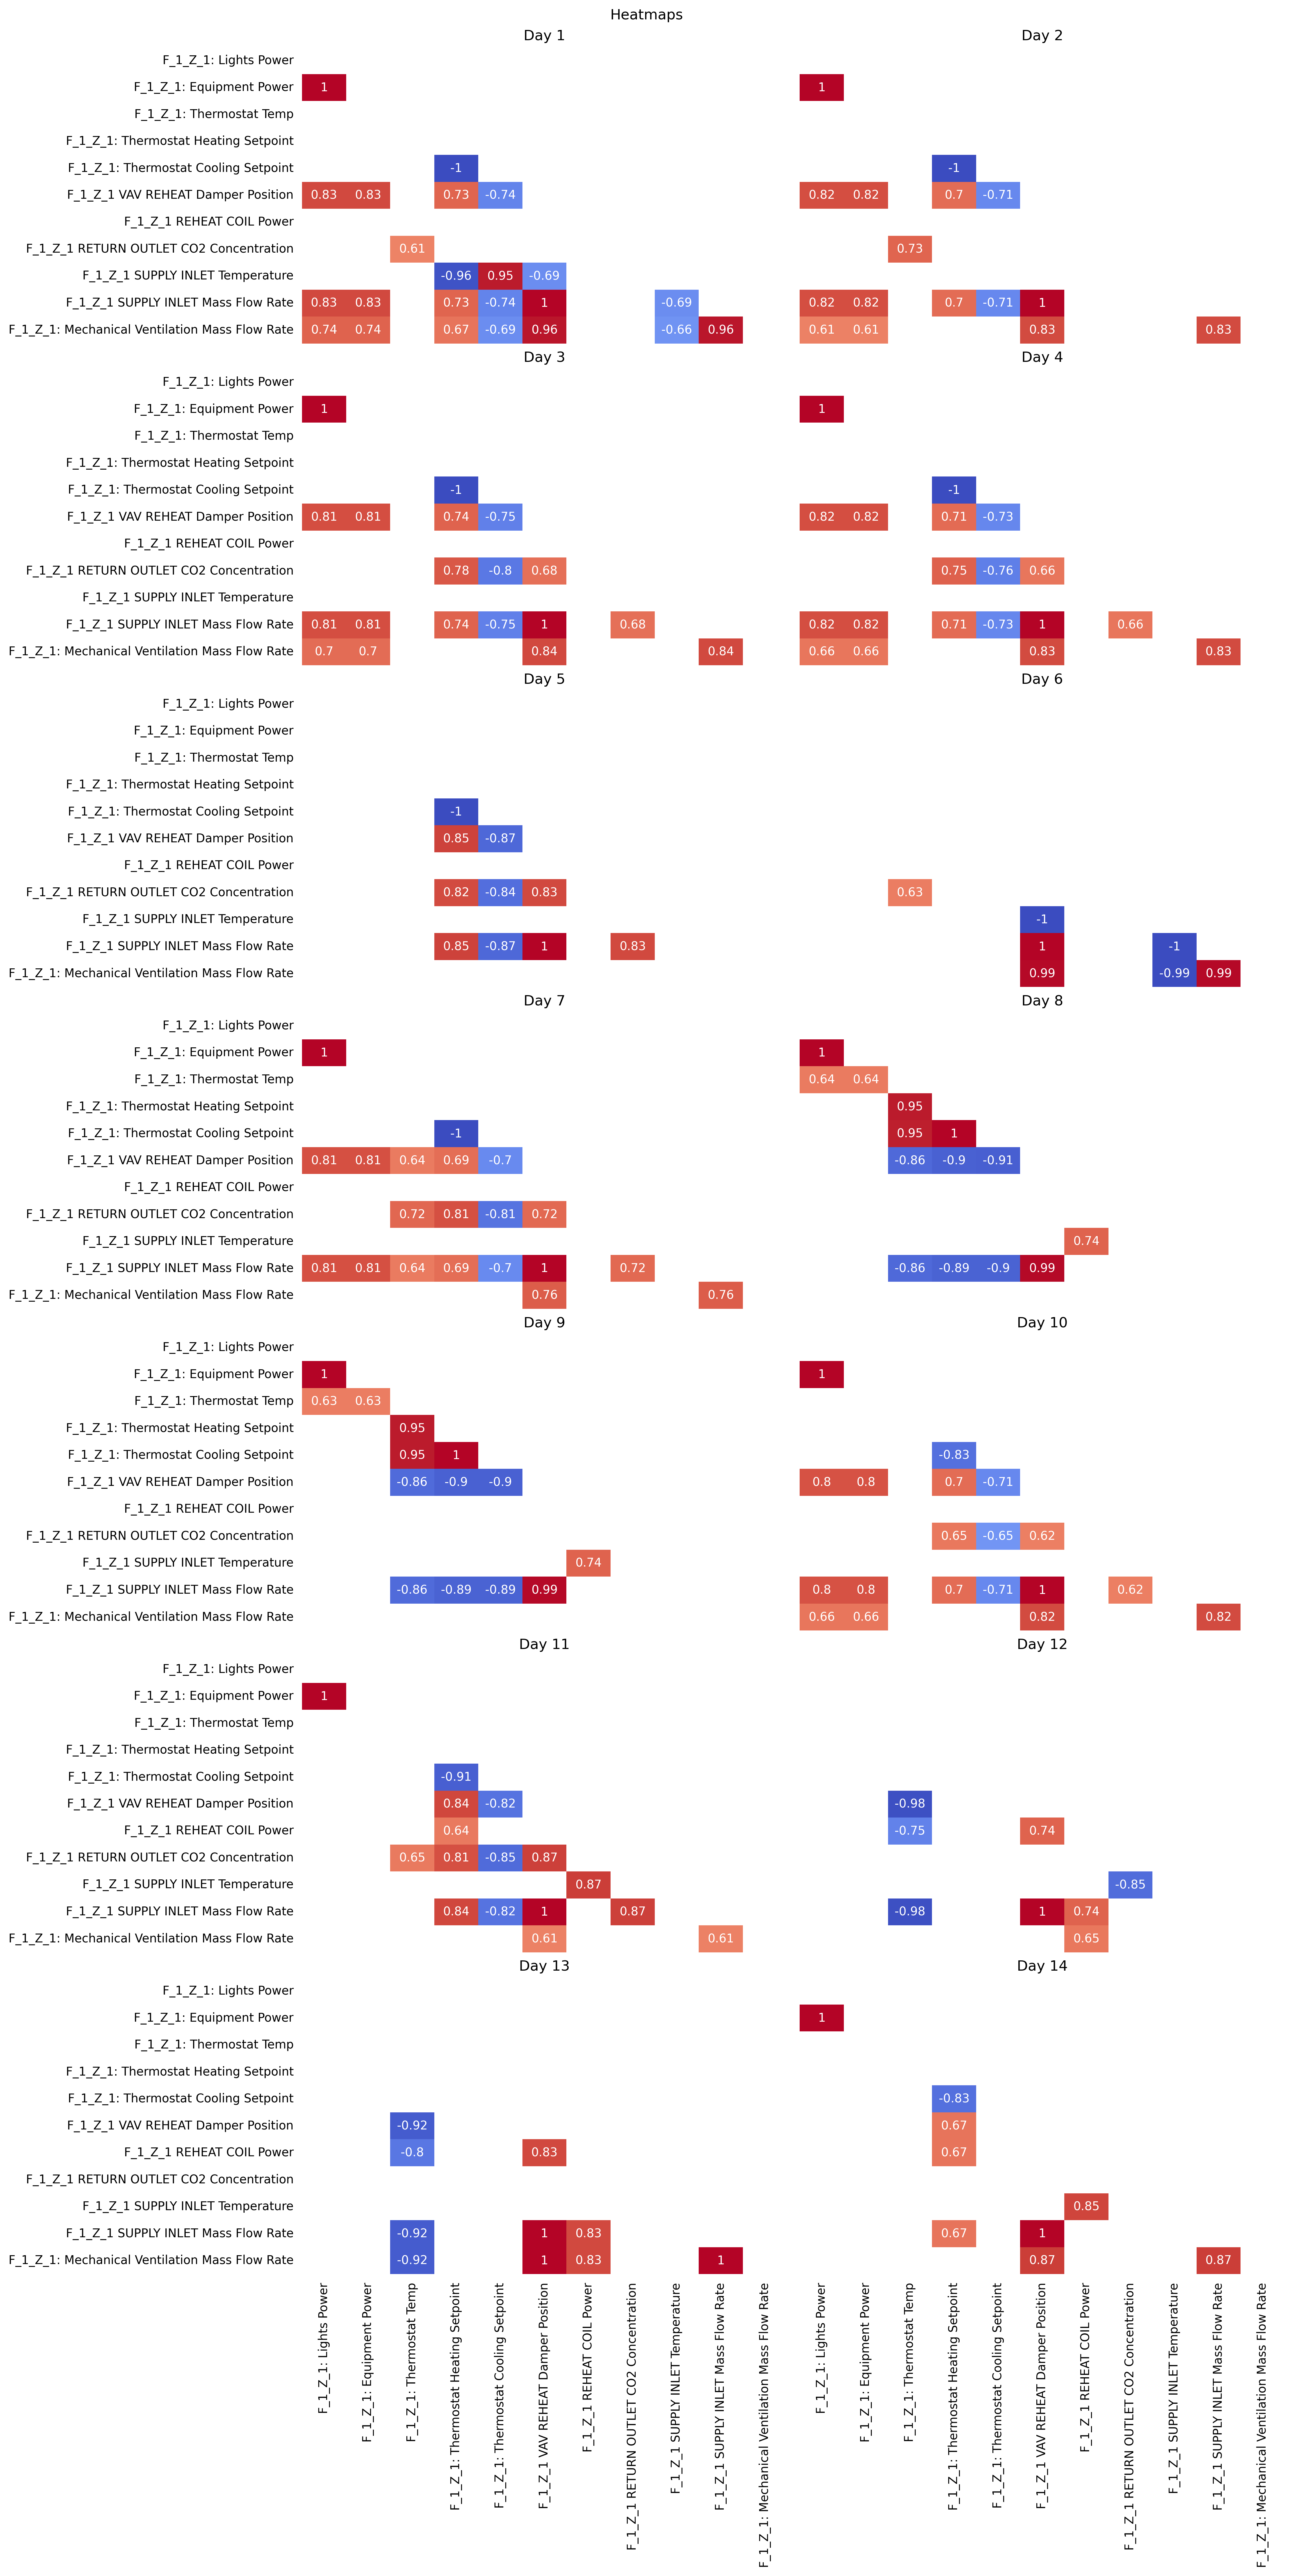

In [186]:
img = Image("heatmaps.png")
img

## Реализация лиц Чернова 

За основу взята реализация, предложенная [тут](https://datascience.oneoffcoder.com/chernoff-faces.html) и  доработанная магистром СПбГЭТУ "ЛЭТИ" В. Киселевой. Вы можете разработать собственный дизайн лица

### Схема кодирования

| **Field** | **Face feature** |
|---|---|
| **F_1_Z_1: Lights Power**            | Hair color |
| **F_1_Z_1: Equipment Power**           | Skin color |
| **F_1_Z_1: Thermostat Temp**         | Hair length at the left side |
| **F_1_Z_1: Thermostat Heating Setpoint**        | Hair length at the right side |
| **F_1_Z_1: Thermostat Cooling Setpoint**         | Curvature of the eyebrow at the left side |
| **F_1_Z_1 VAV REHEAT Damper Position**        | Curvature of the eyebrow at the right side |
| **F_1_Z_1 REHEAT COIL Power**  | Height of the eye at the left side |
| **F_1_Z_1 RETURN OUTLET CO2 Concentration** | Height of the eye at the right side |
| **F_1_Z_1 SUPPLY INLET Temperature**  | Width of the nose |
| **F_1_Z_1 SUPPLY INLET Mass Flow Rate** | Width of the mouth |

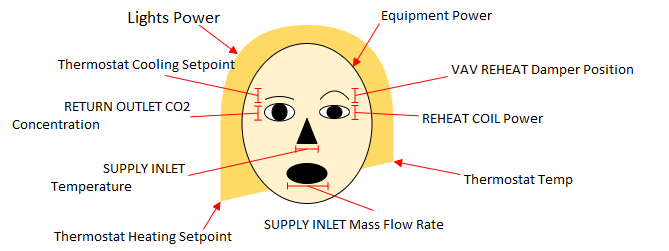


# Реализация

### Расчет средних показателей экспериментов (для их дальнейшей визуализации)


In [187]:
mean_data = []

for i, df in enumerate(data):
    mean_data.append([*df.mean().tolist()])

### Reindex dataframe to fit properties order

In [188]:
mean_df = pd.DataFrame(mean_data, columns=tracked_columns)
mean_df.to_csv('mean_df1.csv', index=False)


reindexed_columns = [ 
    "F_1_Z_1: Lights Power", #цвет волос
    "F_1_Z_1: Equipment Power", # цвет лица
    "F_1_Z_1: Thermostat Temp",#+ длина волос слева  
    "F_1_Z_1: Thermostat Heating Setpoint", #+ длина волос справа
    "F_1_Z_1: Thermostat Cooling Setpoint", #брови слева
    "F_1_Z_1 VAV REHEAT Damper Position", # брови справа
    "F_1_Z_1 REHEAT COIL Power", # глаза слева
    "F_1_Z_1 RETURN OUTLET CO2 Concentration", #глаза справа
    "F_1_Z_1 SUPPLY INLET Temperature", # ширина носа
    "F_1_Z_1 SUPPLY INLET Mass Flow Rate", # ширина рта
]

mean_df = mean_df.reindex(columns=reindexed_columns)


mean_df.to_csv('mean_df2.csv', index=False)

### Определение класса лиц Чернова 


In [193]:
class ChernoffFaces:

    DATA = {
        "HAIR_COLOR": None,
        "SKIN_COLOR": None,    
        "HAIR_LEFT": None, 
        "HAIR_RIGHT": None, 
        "EYEBROW_CURVATURE_LEFT": None,
        "EYEBROW_CURVATURE_RIGHT": None,
        "EYE_HEIGHT_LEFT": None,
        "EYE_HEIGHT_RIGHT": None,
        "PUPIL_SIZE": 0.2,        
        "NOSE_WIDTH": None,
        "MOUTH_HEIGHT": 0.2,
        "MOUTH_WIDTH": None,
    }

    DYNAMIC_PARAMETERS = [
        "HAIR_COLOR",
        "SKIN_COLOR",  
        "HAIR_LEFT",
        "HAIR_RIGHT",
        "EYEBROW_CURVATURE_LEFT",
        "EYEBROW_CURVATURE_RIGHT",
       "EYE_HEIGHT_LEFT",
       "EYE_HEIGHT_RIGHT",
       "NOSE_WIDTH",
       "MOUTH_WIDTH",
    ]

    def __init__(self, df, labels=None, filename='faces'):

        if not labels:
            self.labels = df.iloc[:,0].values
            df = df[df.columns.drop(df.columns[0])]

        self.data = df

        for index, key in enumerate(self.DYNAMIC_PARAMETERS):
            self.DATA[key] = self.data[self.data.columns[index % len(self.data.columns)]].values.tolist()

        
        self.filename = filename

    def render_face(self, ax, title='', index=None):

        height, width = ax.bbox.height, ax.bbox.width

        self.draw_hair(ax, index, width, height)
        self.draw_face(ax, index, width, height)
        self.draw_l_brow(ax, index)
        self.draw_r_brow(ax, index)
        self.draw_l_eye(ax, index)
        self.draw_r_eye(ax, index)
        self.draw_nose(ax, index)   
        self.draw_mouth(ax, index)

        ax.title.set_text(title)
        ax.axis('off')
        ax.autoscale()

    def draw_hair(self, ax, index, width, height):

        hair_width = width
        hair_height = height

        colour = plt.cm.coolwarm(self.DATA["HAIR_COLOR"][index])  #настройка цветов

        trapeze = Polygon(
            xy=[
                [0, hair_height * 0.5 * (1 - self.DATA["HAIR_LEFT"][index])],
                [0, hair_height * 0.5],
                [hair_width, hair_height * 0.5],
                [hair_width, hair_height * 0.5 * (1 - self.DATA["HAIR_RIGHT"][index])],
            ], 
            fc=colour
        )
        ax.add_patch(trapeze)

        top = Wedge(
            center=[hair_width / 2, hair_height * 0.5 - 1], 
            r=hair_width / 2,
            theta1=0, 
            theta2=180,
            edgecolor='none', 
            fc=colour,
        )
        ax.add_patch(top)

    def draw_face(self, ax, index, width, height):

        face_width = width * 2/3
        face_height = height * 1/2
        self.UNIT_WIDTH = face_width / 7
        self.UNIT_HEIGHT = face_height / 7
        self.FACE_CENTER = [width / 2, height / 2]

        colour = plt.cm.RdBu(self.DATA["SKIN_COLOR"][index]) #настройка цветов

        ellipse = Ellipse(
        xy=self.FACE_CENTER, 
        width=face_width, 
        height=face_height, 
        edgecolor='black', 
        fc=colour, 
        lw=2
        )
        ax.add_patch(ellipse)

    def draw_l_brow(self, ax, index):

        brow_width = self.UNIT_WIDTH * 1.5
        brow_height =  self.UNIT_HEIGHT * self.DATA["EYEBROW_CURVATURE_LEFT"][index]
        if brow_height == 0:
            brow_height = 0.001

        brow_l_center = [sum(i) for i in zip(*[ 
            self.FACE_CENTER, 
            [brow_width,  self.UNIT_HEIGHT * 1.1] 
        ])]

        brow_l = Arc(
            xy=brow_l_center, 
            width=brow_width, 
            height=brow_height, 
            theta1=0, 
            theta2=180,
            edgecolor='black', 
            fc='None', 
            lw=2
        )
        ax.add_patch(brow_l)

    def draw_r_brow(self, ax, index):

        brow_width = self.UNIT_WIDTH * 1.5
        brow_height =  self.UNIT_HEIGHT * self.DATA["EYEBROW_CURVATURE_RIGHT"][index]

        if brow_height == 0:
            brow_height = 0.001

        brow_r_center = [sum(i) for i in zip(*[ 
            self.FACE_CENTER, 
            [-brow_width,  self.UNIT_HEIGHT * 1.1] 
        ])]

        brow_r = Arc(
            xy=brow_r_center, 
            width=brow_width, 
            height=brow_height, 
            theta1=0, 
            theta2=180,
            edgecolor='black', 
            fc='None', 
            lw=2
        )
        ax.add_patch(brow_r)

    def draw_l_eye(self, ax, index):

        eye_width = self.UNIT_WIDTH * 1.5
        eye_height =  self.UNIT_HEIGHT * self.DATA["EYE_HEIGHT_LEFT"][index] 

        if eye_height == 0:
            eye_height = 0.001

        eye_l_center = [sum(i) for i in zip(*[ 
            self.FACE_CENTER, 
            [-eye_width,  self.UNIT_HEIGHT / 2] 
        ])]

        ellipse = Ellipse(
            xy=eye_l_center, 
            width=eye_width, 
            height=eye_height, 
            edgecolor='black', 
            fc='white', 
            lw=1
        )
        ax.add_patch(ellipse)

        ellipse = Ellipse(
            xy=eye_l_center, 
            width=eye_width / 2, 
            height=eye_height, 
            edgecolor='black', 
            fc='black', 
            lw=1
        )
        ax.add_patch(ellipse)

    def draw_r_eye(self, ax, index):

        eye_width = self.UNIT_WIDTH * 1.5
        eye_height =  self.UNIT_HEIGHT * self.DATA["EYE_HEIGHT_RIGHT"][index] 

        if eye_height == 0:
            eye_height = 0.001

        eye_r_center = [sum(i) for i in zip(*[ 
            self.FACE_CENTER, 
            [eye_width,  self.UNIT_HEIGHT / 2] 
        ])]

        ellipse = Ellipse(
            xy=eye_r_center, 
            width=eye_width, 
            height=eye_height, 
            edgecolor='black', 
            fc='white', 
            lw=1
        )
        ax.add_patch(ellipse)   

        ellipse = Ellipse(
            xy=eye_r_center, 
            width=eye_width / 2, 
            height=eye_height, 
            edgecolor='black', 
            fc='black', 
            lw=1
        )
        ax.add_patch(ellipse)

    def draw_nose(self, ax, index):

        nose_width = self.UNIT_WIDTH * (1 - self.DATA["NOSE_WIDTH"][index])
        nose_height =  self.UNIT_HEIGHT  

        pivot_left = [sum(i) for i in zip(*[ 
            self.FACE_CENTER, 
            [-nose_width / 2,  -nose_height] 
        ])]

        pivot_right = [sum(i) for i in zip(*[ 
            self.FACE_CENTER, 
            [nose_width / 2,  -nose_height] 
        ])]

        pivot_top = self.FACE_CENTER

        points = np.array([pivot_left, pivot_right, pivot_top])
        nose = plt.Polygon(
            points, 
            closed=True, 
            lw=1,
            fc="black", 
            edgecolor='black',
        )
        ax.add_patch(nose)

    def draw_mouth(self, ax, index):

        mouth_width = self.UNIT_WIDTH * 3 * self.DATA["MOUTH_WIDTH"][index] 
        mouth_height = self.UNIT_HEIGHT * 1.5 * self.DATA["MOUTH_HEIGHT"]

        mouth_center = [sum(i) for i in zip(*[ 
            self.FACE_CENTER, 
            [0,  -self.UNIT_HEIGHT * 2] 
        ])]

        ellipse = Ellipse(
            xy=mouth_center, 
            width=mouth_width, 
            height=mouth_height, 
            edgecolor='black', 
            fc="black",  
            lw=1
        )
        ax.add_patch(ellipse)

    def render(self, n_cols=2, n_rows=1, figsize=(2, 2), empty_cols_ids=()):
        fig, ax = plt.subplots(
            nrows=n_rows, 
            ncols=n_cols, 
            figsize=figsize, 
            sharey=True,
            sharex=True,
            constrained_layout=True,
        )
        fig.patch.set_facecolor('white')
        axes = ax.flatten()
        for i, ax in enumerate(axes):
            if i in empty_cols_ids:
                ax.remove()
            if i == 0:
                self.render_face(ax, title=f"Reference", index=i)
                continue
            self.render_face(ax, title=f"Day {i}", index=i)

        plt.savefig(f"{self.filename}.png", bbox_inches="tight")
        plt.close()

In [194]:
reference = pd.DataFrame([(0.5 for _ in range(8))], columns=reindexed_columns)

mean_df = pd.DataFrame(
   preprocessing.MinMaxScaler().fit_transform(mean_df.values), 
    columns=mean_df.columns
)

mean_df = pd.concat([reference, mean_df])

### Построение визуализации для различных дней эксперимента


In [195]:
c = ChernoffFaces(mean_df)
c.render(
    n_cols = 5,
    n_rows = 3,
    figsize=(15, 10),
)

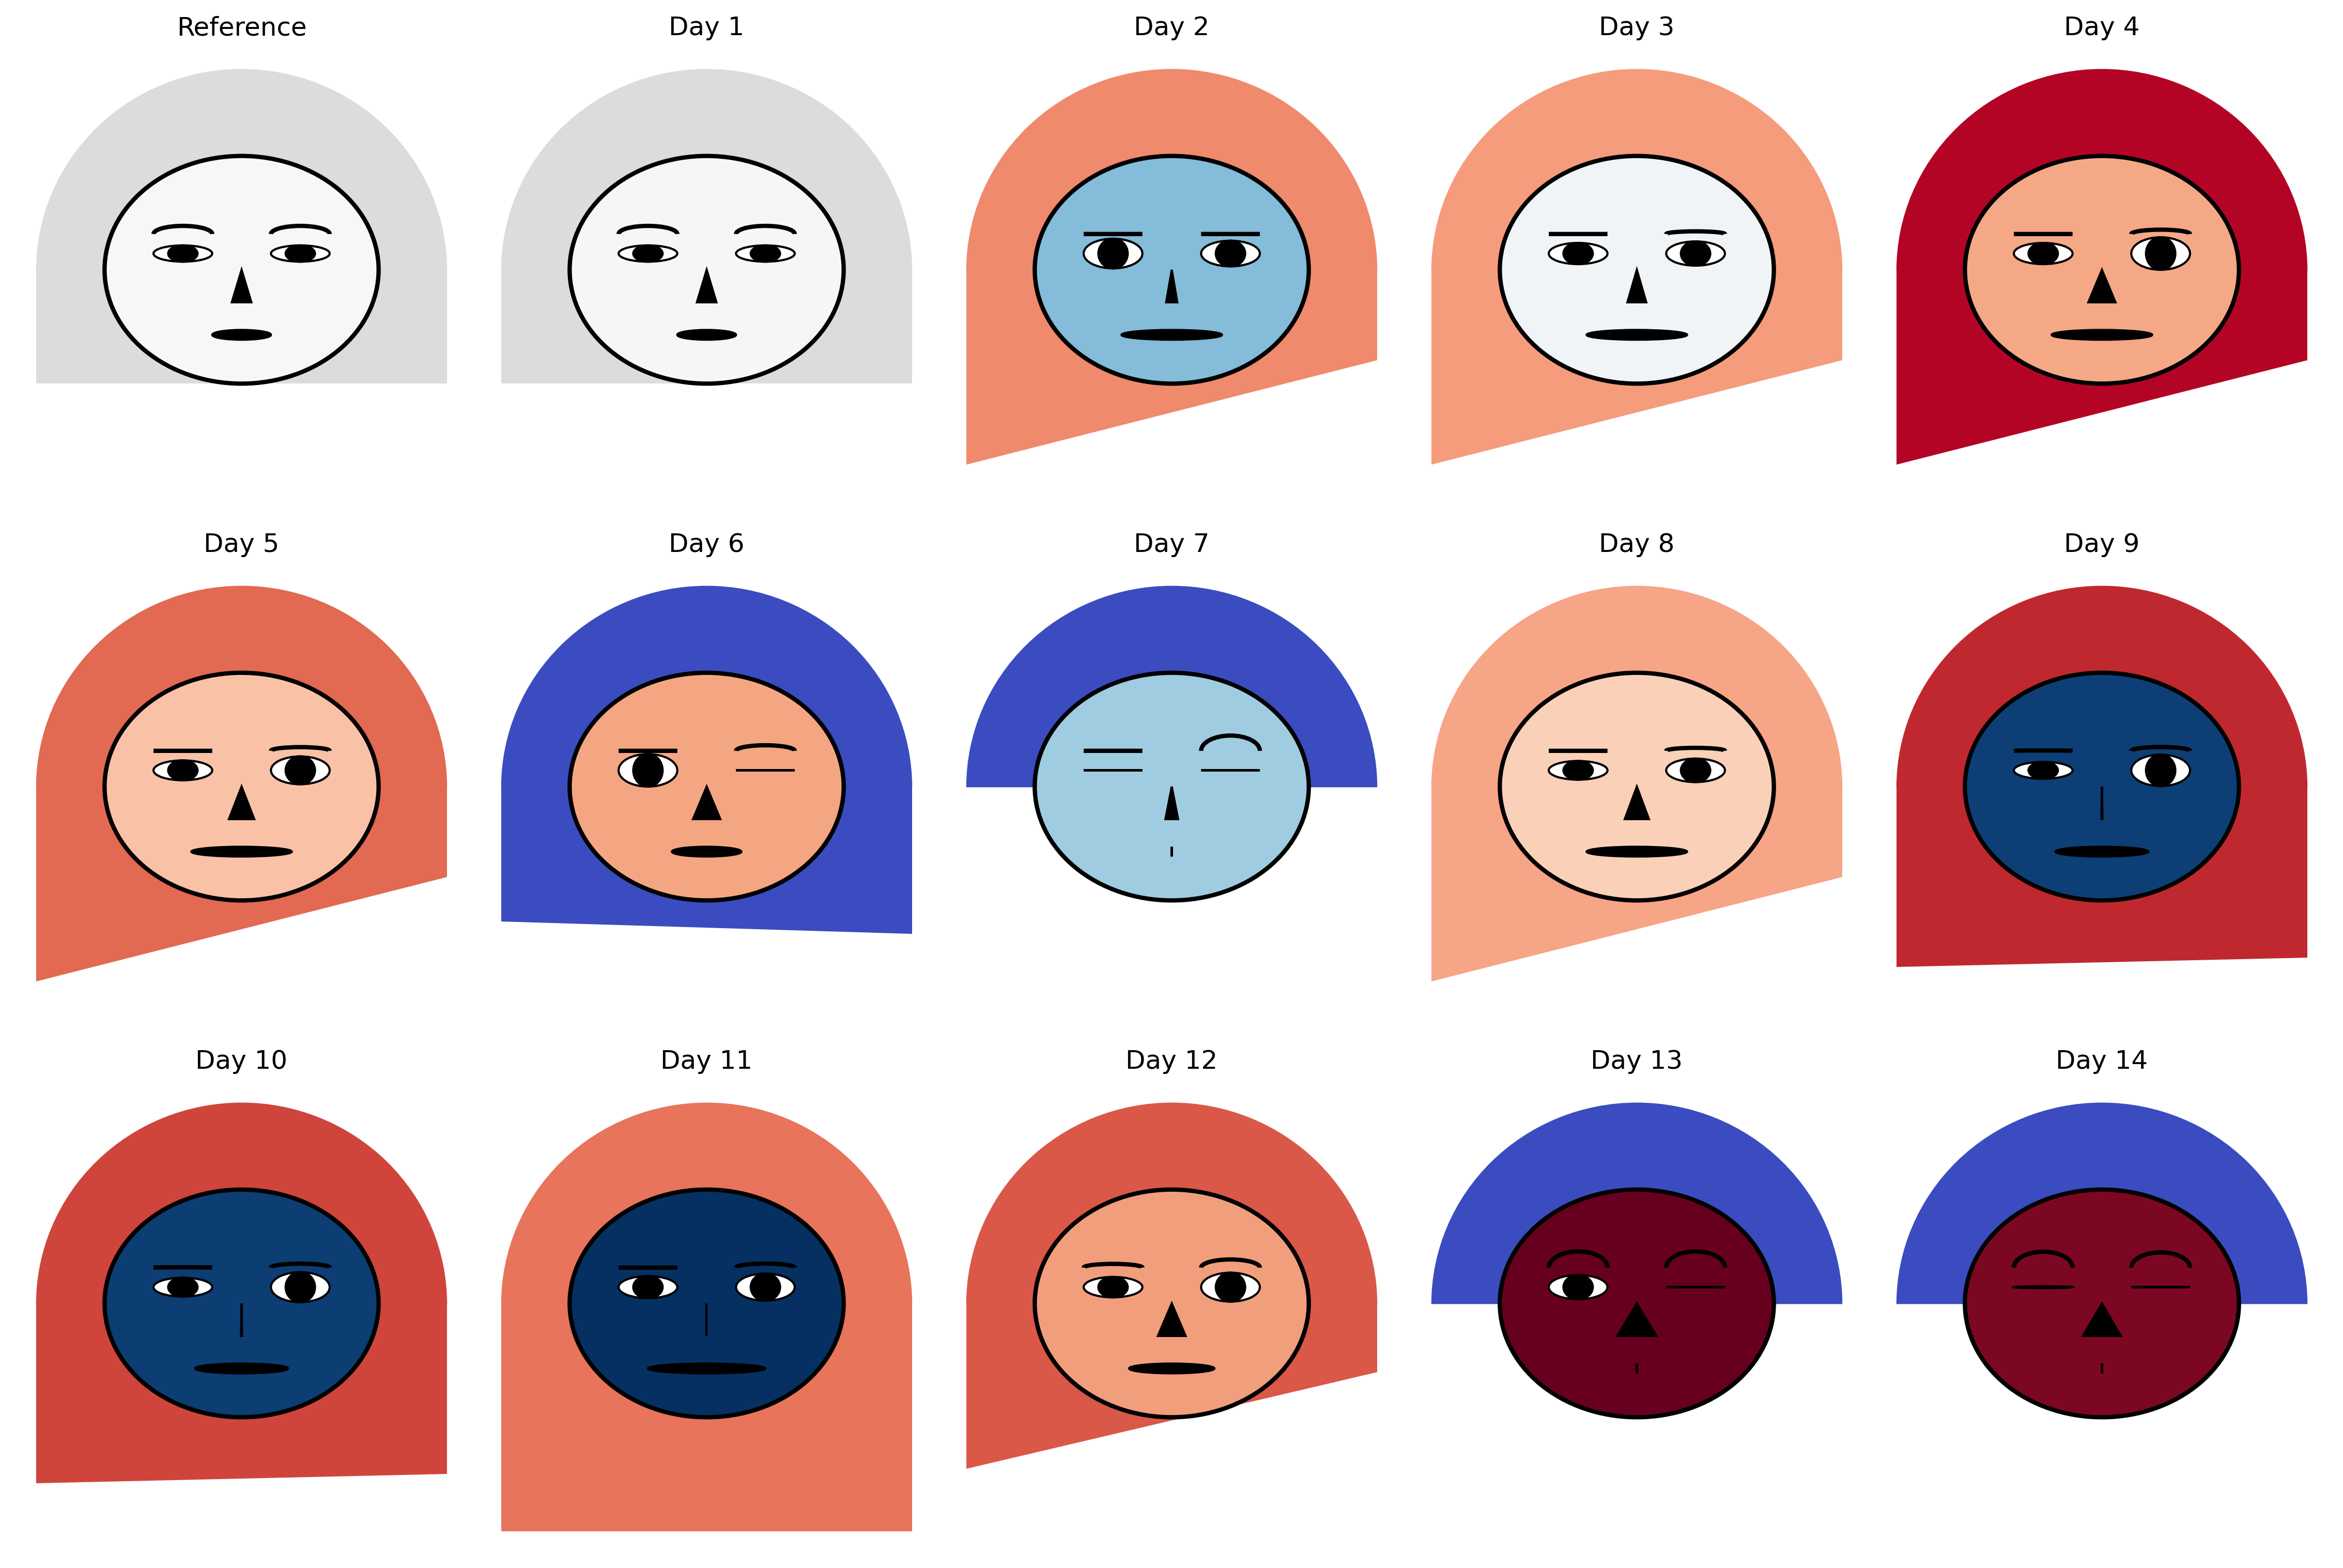

In [196]:
img = Image("faces.png")
img